# 1.3. Functions and Classes

---------

In [1]:
import numpy as np

### Class Circle

In [2]:
def area(r):
    A = np.pi*r**2
    return A

In [3]:
area(10)

314.1592653589793

In [4]:
def circumference(r):
    C = 2*np.pi*r
    return C

In [5]:
circumference(10)

62.83185307179586

In [6]:
class Circle():
    def __init__(self, r):
        self.r = r
        
        
    def area(self):
        A = np.pi*self.r**2
        return A
    
    def circumference(self):
        C = 2*np.pi*self.r
        return C

In [7]:
Circle(5).area()

78.53981633974483

In [8]:
CC = Circle(5)
CC.area(),CC.circumference()

(78.53981633974483, 31.41592653589793)

In [9]:
CC

In [10]:
CC.r

5

In [11]:
for r in [2,3,6,24,25,46,567]:
    CC = Circle(r)
    print("radius: " , r, "area : " , CC.area(), "circumf : " , CC.circumference())

radius:  2 area :  12.566370614359172 circumf :  12.566370614359172
radius:  3 area :  28.274333882308138 circumf :  18.84955592153876
radius:  6 area :  113.09733552923255 circumf :  37.69911184307752
radius:  24 area :  1809.5573684677208 circumf :  150.79644737231007
radius:  25 area :  1963.4954084936207 circumf :  157.07963267948966
radius:  46 area :  6647.610054996002 circumf :  289.02652413026095
radius:  567 area :  1009987.480609929 circumf :  3562.5660691708254


#### Class Gravity

In [12]:
def gravity(m1,m2,d):
    F = (m1*m2)/d**2
    return F

In [13]:
gravity(5,4,10)

0.2

In [14]:
class Newton():
    
    def __init__(self,value_of_G, value_of_g, supplied_info):
        self.G = value_of_G
        self.info = supplied_info
        self.g = value_of_g
        
    
    def gravity(self,m1,m2,d):
        F = self.G*(m1*m2)/d**2
        print(self.info)
        return F  
    

    def gravity_pot(self,m1):
        F = m1*self.g
        return F
    
        
    
        

In [15]:
N1 = Newton(value_of_G =6.7, value_of_g= 9.8, supplied_info = "great job")

In [16]:
N1.G, N1.g,N1.gravity(2,3,13),N1.gravity_pot(12)

great job


(6.7, 9.8, 0.2378698224852071, 117.60000000000001)

In [17]:
N1.gravity(m1=11,m2=12,d=3)

great job


98.26666666666667

---------

### Project: N-charge system

---------

$ E = q * \frac{\hat{r}}{r}$

$ V  = q * \frac{1}{r}$

$ V  = q * \frac{1}{\sqrt{((x-x^{'})^{2} + (y - y^{'})^{2})}} $


In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
% matplotlib inline
import seaborn as sns
sns.set()

#### Class Charge

In [19]:
class Charge:
    
    '''Data incapsulation'''
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
        
        
    def line(self, x,y):
        '''create a vector from charge to observation point'''
        self.vector = [x-self.pos[0],y-self.pos[1]]
        '''norm of the vector'''
        self.norm = np.sqrt((self.vector[0])**2+(self.vector[1])**2)
        
    
    def V_point_charge(self, x, y):
        '''recall length'''
        self.line(x,y)
        '''Make sure to exclude source itself'''
        if self.norm >0:
            self.V = self.q/self.norm
            
            '''if length is zero, set V equal to 0'''
        else:
            self.V = 0
        return self.V
    

#### Example :  Lets use charge q = 100 at posiotion x =5 and y =5 to find electric potential at different points in 2D

In [40]:
C = Charge(100, [5,5])

In [41]:
for x in range(10):
    for y in range(10):
        print(x,y, "|", C.V_point_charge(x, y))

0 0 | 5.652334189442215
0 1 | 5.892556509887896
0 2 | 6.142951168339512
0 3 | 6.401843996644799
0 4 | 6.666666666666667
0 5 | 6.933752452815364
0 6 | 7.198157507486946
0 7 | 7.453559924999299
0 8 | 7.6923076923076925
0 9 | 7.905694150420948
1 0 | 5.872202195147034
1 1 | 6.142951168339512
1 2 | 6.42824346533225
1 3 | 6.726727939963125
1 4 | 7.035975447302919
1 5 | 7.352146220938077
1 6 | 7.669649888473704
1 7 | 7.9808688446762215
1 8 | 8.27605888602368
1 9 | 8.54357657716761
2 0 | 6.097107608496923
2 1 | 6.401843996644799
2 2 | 6.726727939963125
2 3 | 7.071067811865475
2 4 | 7.432941462471663
2 5 | 7.808688094430304
2 6 | 8.192319205190405
2 7 | 8.574929257125442
2 8 | 8.94427190999916
2 9 | 9.284766908852594
3 0 | 6.324555320336759
3 1 | 6.666666666666667
3 2 | 7.035975447302919
3 3 | 7.432941462471663
3 4 | 7.856742013183862
3 5 | 8.304547985373997
3 6 | 8.770580193070293
3 7 | 9.245003270420485
3 8 | 9.712858623572641
3 9 | 10.15346165133619
4 0 | 6.551217820804184
4 1 | 6.9337524528

#### Total Electric potential

In [20]:
def V_total(x, y, charges):
    V = 0
    for C in charges:
        Vp = C.V_point_charge(x, y)
        V  = V+Vp
    return V

##### Example: Lets use collection of charges to find a electric potential at point x = 4, y =4

In [47]:
sample_charges = [Charge(q = 20, pos = [23,34]),
                  Charge(q = 25, pos = [13,48]),
                  Charge(q = 40, pos = [3,14]),
                  Charge(q = 80, pos = [88,60])]


V_total(x=4, y=4, charges = sample_charges)

5.892446541150622

### Implementation - 1 : Lattice of charges

In [21]:
'''first charge to be at x=1,y=1'''
q = 100

'''Dictionary to collect charges, x and y xoordinates'''
Qd = []

'''List to collect Charge objects'''
charges = []


'''use for loops to construct collection of charges objects'''
for i in range(5):
    for j in range(5):
        
        '''This dictionary is collecting charges and their coordinates'''
        Qd.append({"q": q, "x": i*20, "y":j*20})
        
        
        '''charge objects are being collected'''
        charges.append(Charge(q , [20*i, 20*j]))
        
        '''change the sign of charge alternatly'''
        q = -q
  

In [22]:
import json
with open ('data/charg-lattice.json', 'w')as f1:
    json.dump(Qd,f1)

#### Plot of lattice of charges

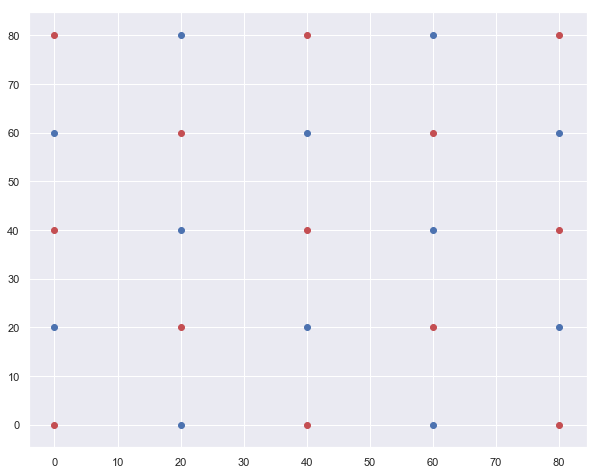

In [23]:
'''Plot the lattice of charges'''

plt.figure(figsize = [10,8])

for item in Qd:
    
    '''Sctaeer as red dot if charge is positive'''
    if item['q']> 0:
        plt.scatter(item['x'], item['y'], c = 'r')
        
        
        '''Scatter as blue dot if charge is negative'''
    else:
        plt.scatter(item['x'], item['y'], c = 'b')
        
plt.savefig('plot/charge-lattice.pdf')           
plt.show()

#### Find Electric Potential

In [24]:
'''Create X and Y coordinate'''
X = np.arange(-10,110,1)
Y = np.arange(-10,110,1)

'''Initiate vacant V-list of list'''
V = [[0.0 for i in range(len(X))] for j in range(len(Y))]

'''Calculate Electric potential at each x,y coordinate'''
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        v = V_total(x, y, charges)
        V[i][j] = v       

In [25]:
VV = np.array(V)

#### Save electric potential data

In [26]:
import json
with open ('data/potential-lattice.json', 'w')as f2:
    json.dump(V,f2)

##### Plot Electric potential

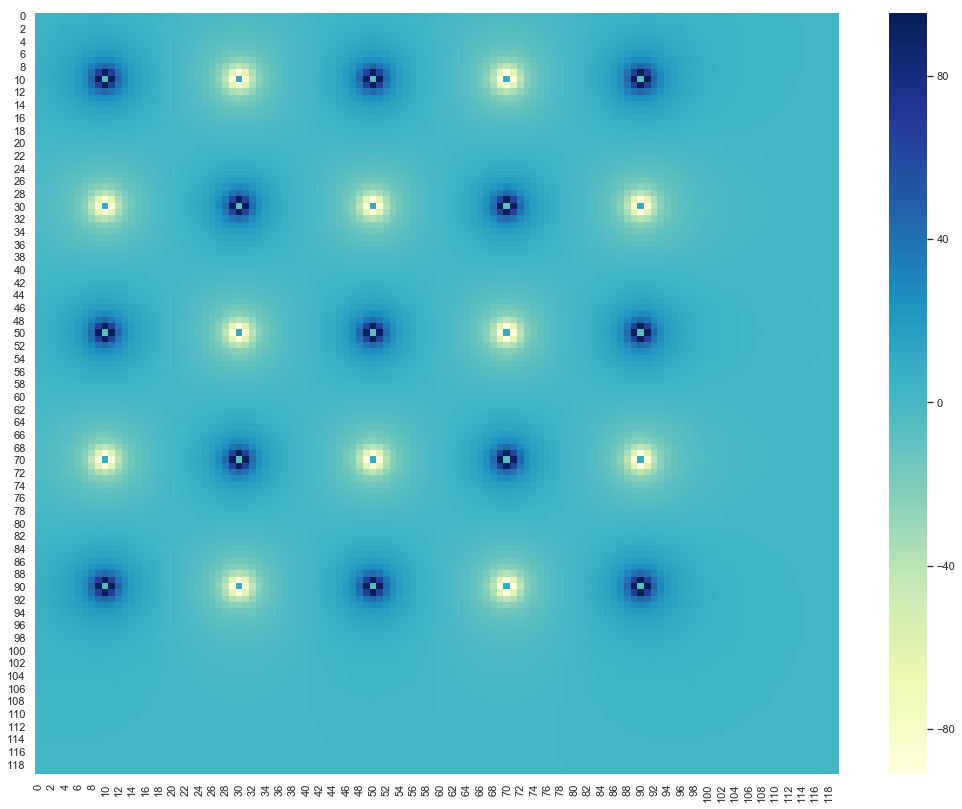

In [27]:
plt.figure(figsize = [18,14])
sns.heatmap(VV,annot=False,cmap='YlGnBu')
plt.savefig('plot/potential-lattice.png')  
plt.show()

### Implementation - 2 : Random Charges

In [28]:
import random as random

In [29]:
'''first charge to be at x=1,y=1'''
q = 20

'''Dictionary to collect charges, x and y xoordinates'''
Qd = []

'''List to collect Charge objects'''
charges = []


'''use for loops to construct collection of charges objects'''
for i in range(10):
    for j in range(10):
        
        rx = random.randint(1,100)
        ry = random.randint(1,100)
        
        '''This dictionary is collecting charges and their coordinates'''
        Qd.append({"q": q, "x": rx, "y":ry})
        
        
        '''charge objects are being collected'''
        charges.append(Charge(q , [rx,ry]))
        
        '''change the sign of charge alternatly'''
        q = -q

##### Save charge configuration

In [30]:
import json
with open ('data/charg-random.json', 'w')as f3:
    json.dump(Qd,f3)

##### Plot charge system

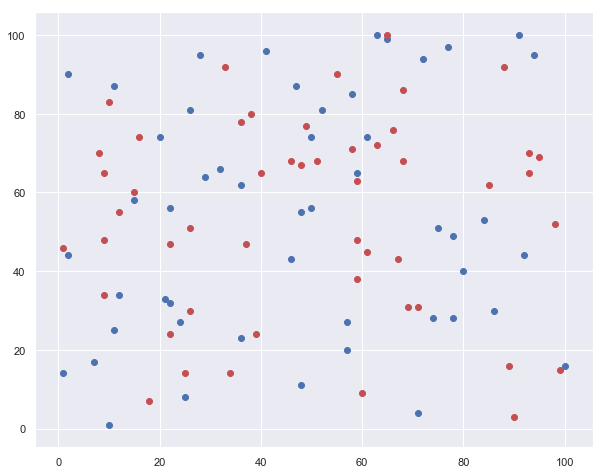

In [31]:
'''Plot the lattice of charges'''

plt.figure(figsize = [10,8])

for item in Qd:
    
    '''Sctaeer as red dot if charge is positive'''
    if item['q']> 0:
        plt.scatter(item['x'], item['y'], c = 'r')
        
        
        '''Scatter as blue dot if charge is negative'''
    else:
        plt.scatter(item['x'], item['y'], c = 'b')
plt.savefig('plot/charge-random.pdf')      
plt.show()

##### Calculate electric potential

In [32]:
'''Create X and Y coordinate'''
X = np.arange(-10,110,1)
Y = np.arange(-10,110,1)

'''Initiate vacant V-list of list'''
V = [[0.0 for i in range(len(X))] for j in range(len(Y))]

'''Calculate Electric potential at each x,y coordinate'''
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        v = V_total(x, y, charges)
        V[i][j] = v       

##### Save electric potential dta

In [33]:
import json
with open ('data/potential-random.json', 'w')as f4:
    json.dump(V,f4)

##### Plot potential

In [34]:
V = np.array(V)

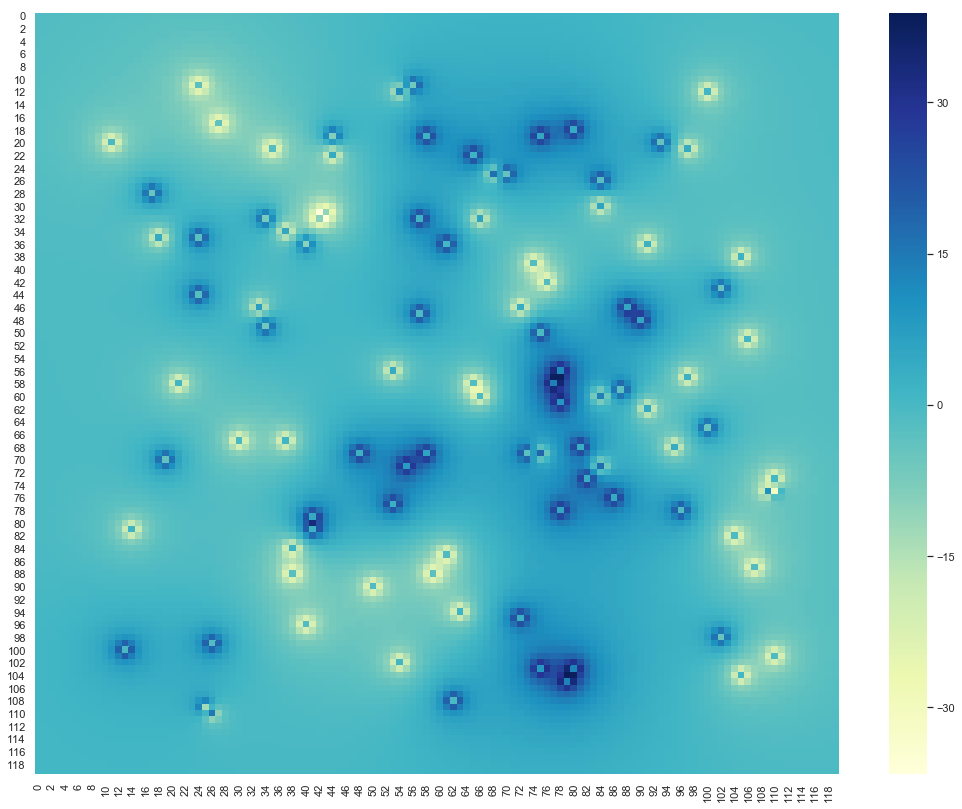

In [35]:
plt.figure(figsize = [18,14])
sns.heatmap(V,annot=False,cmap='YlGnBu')
plt.savefig('plot/potential-random.pdf')  
plt.show()

#### Much finner

In [36]:
'''Create X and Y coordinate'''
X = np.arange(-10,110,0.5)
Y = np.arange(-10,110,0.5)

'''Initiate vacant V-list of list'''
V = [[0.0 for i in range(len(X))] for j in range(len(Y))]

'''Calculate Electric potential at each x,y coordinate'''
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        v = V_total(x, y, charges)
        V[i][j] = v       

In [37]:
V = np.array(V)

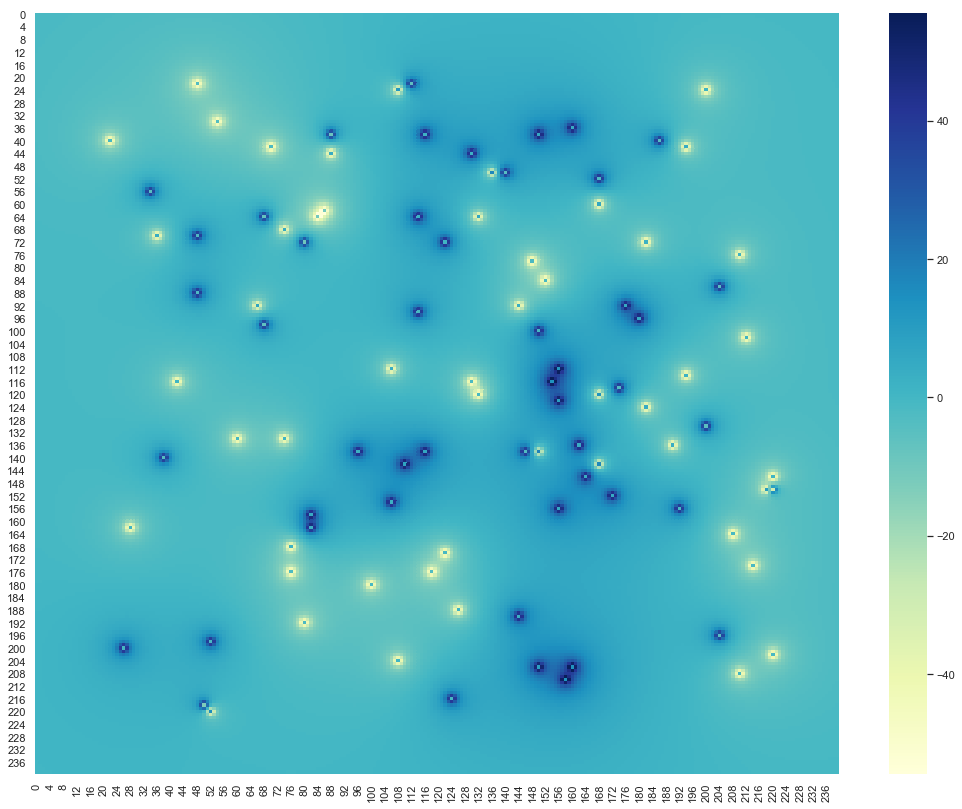

In [38]:
plt.figure(figsize = [18,14])
sns.heatmap(V,annot=False,cmap='YlGnBu')
plt.savefig('plot/potential-random.pdf')  
plt.show()

------------

### Assignment 
***1. Create charges in a circle of radius 25 with 16 charge system***

***3. Save charge configuration data (dictionary) to a json file***

***3. Calculate electric potential for 2D grid and save data to a json file***

***4. Develope a 2D plot and save as 'png' or 'pdf' file***